- (c) Ken-ichi Fukui, 2020/01/17
- MIT License

## 多層パーセプトロンによる手書き文字認識

In [2]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from neuralnet import NeuralNetMLP
from sklearn.decomposition import PCA

### MNISTデータの読み込み関数

In [3]:
def load_mnist(path, kind='train'):

    labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte'% kind)
   
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels

In [4]:
# MNISTデータの読み込み
current_path = os.path.dirname(os.path.realpath('__file__'))
X_train, y_train = load_mnist(current_path, kind='train')
X_test, y_test = load_mnist(current_path, kind='t10k')

In [5]:
# 学習データとテストデータは最初の1000個用いる
n_training_data = 1000
n_test_data = 1000

X_trn = X_train[:n_training_data][:]
y_trn = y_train[:n_training_data][:]
X_tst = X_test[:n_test_data][:]
y_tst = y_test[:n_test_data][:]

### PCAによる次元圧縮

In [6]:
n_components = 10
pca = PCA(n_components)
pca.fit(X_trn)
X_trn_pca = pca.transform(X_trn)
X_tst_pca = pca.transform(X_tst)

### 多層パーセプトロン(MLP)のインスタンスの生成と学習

In [7]:
nn = NeuralNetMLP(n_output=10,              # 出力ユニット数
                  n_features=n_components,  # 入力ユニット数
                  n_hidden=30,              # 隠れユニット数
                  l2=2.0,                   # L2正則化のλパラメータ
                  l1=0.0,                   # L1正則化のλパラメータ
                  epochs=300,               # 学習エポック数
                  eta=0.001,                # 学習率の初期値
                  alpha = 0.001,            # モーメンタム学習の1つ前の勾配の係数
                  decrease_const=0.00001,   # 適応学習率の減少定数
                  minibatches=10,           # 各エポックでのミニバッチ数
                  shuffle=True,             # データのシャッフル
                  random_state=1)           # 乱数シードの状態
                  
nn.fit(X_trn_pca, y_trn, print_progress=True)

Epoch: 300/300

### 学習履歴の描画

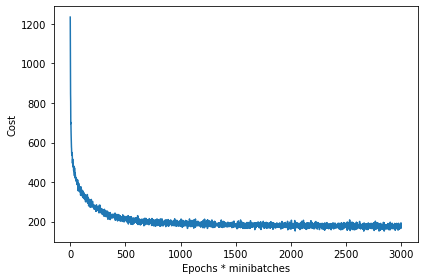

In [8]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs * minibatches')
plt.tight_layout()

### 学習データおよびテストデータに対するAccuracyの算出

In [9]:
y_trn_pred = nn.predict(X_trn_pca)
acc = np.sum(y_trn == y_trn_pred, axis=0)*100 / X_trn_pca.shape[0]
print('accuracy for training data: %.2f%%' % acc)

y_tst_pred = nn.predict(X_tst_pca)
acc = np.sum(y_tst == y_tst_pred, axis=0)*100 / X_tst_pca.shape[0]
print('accuracy for test data: %.2f%%' % acc)

accuracy for training data: 84.10%
accuracy for test data: 73.50%
